In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import zero_one_loss
from math import log, isclose, exp
from tqdm import tqdm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [49]:
def read_dataset(filename):
    data = pd.read_csv(filename)
    X = data.values[:, :-1]
    y = np.vectorize(lambda t: 1 if t == 'P' else -1)(data.values[:, -1])
    indices = np.arange(y.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]

In [132]:
class AdaBoost():
    def __init__(self, clfs_cnt):
        self.clfs_cnt = clfs_cnt
        self.clfs_ = None
        self.clf_weights_ = None
        
    def fit(self, X, y):
        cnt, dim = X.shape
        sample_weight = np.repeat(1 / cnt, cnt)
        self.clf_weights_ = []
        self.clfs_ = [DecisionTreeClassifier(max_depth=2) for i in range(self.clfs_cnt)]
        
        l = X.shape[0]
        cur_trained = 1
        accuracies = []
        for clf in tqdm(self.clfs_):
            clf.fit(X, y, sample_weight=sample_weight)
            y_pred = clf.predict(X)
            
            weighted_error = zero_one_loss(y, y_pred, normalize=True, sample_weight=sample_weight)
            
            if isclose(weighted_error, 0):
                accuracies.append(1.0)
                cur_trained += 1
                self.clf_weights_.append(1.0)
                continue
            elif isclose(weighted_error, 1):
                accuracies.append(0.0)
                cur_trained += 1
                self.clf_weights_.append(-1.0)
                continue


            alpha = 0.5 * log((1 - weighted_error) / weighted_error)    
    
            self.clf_weights_.append(alpha)
            sample_weight = sample_weight * np.exp(-alpha * (y * y_pred))
            sample_weight /= np.sum(sample_weight)
            
            answers = self.predict(X, cur_trained)
            correct = 0
            incorrect = 0
            for i in range(len(y)):
                correct += answers[i] == y[i]
                incorrect += answers[i] != y[i]
            
            accuracies.append(correct / (correct + incorrect))
            cur_trained += 1
            

        self.clf_weights_ = np.array(self.clf_weights_)
        self.clfs_ = np.array(self.clfs_)
        
        return accuracies
        
    def predict(self, X, clfs_cnt=None):
        if clfs_cnt == None:
            clfs_cnt = self.clfs_cnt
            
        cnt, dim = X.shape
        answers = np.zeros(cnt)
        for i in range(clfs_cnt):
            answers += self.clf_weights_[i] * self.clfs_[i].predict(X)
        return np.sign(answers)

In [127]:
datasets_files = ["chips.csv", "geyser.csv"]
all_accuracies = []
clfs = []
datasets = []
for file in tqdm(datasets_files):
    X, y = read_dataset(file)
    datasets.append((X, y))
    classifier = AdaBoost(55)
    accuracies = classifier.fit(X, y)
    clfs.append(classifier)
    all_accuracies.append(accuracies)
    print(*accuracies, sep="\n")


 58%|█████▊    | 32/55 [00:00<00:00, 318.72it/s]

0.7033898305084746
0.7033898305084746
0.7457627118644068
0.7966101694915254
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.8559322033898306
0.9067796610169492
0.9152542372881356
0.9152542372881356
0.9322033898305084
0.940677966101695
0.9322033898305084
0.940677966101695
0.9322033898305084
0.940677966101695
0.940677966101695
0.940677966101695
0.9152542372881356
0.9491525423728814
0.940677966101695
0.940677966101695
0.940677966101695
0.9745762711864406
0.940677966101695
0.9491525423728814
0.9322033898305084
0.940677966101695
0.9491525423728814
0.940677966101695
0.9491525423728814
0.940677966101695
0.9491525423728814
0.9491525423728814
0.9491525423728814
0.9491525423728814
0.9576271186440678
0.9491525423728814
0.9576271186440678
0.9576271186440678
0.9491525423728814
0.9576271186440678
0.9491525423728814
0.9491525423728814
0.9576271186440678
0.9661016949152542
0.9745762711864406
0.9745762711864406
0.9745762711864406
0.9830508474576272
0.966


100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.9009009009009009
0.8963963963963963
0.9009009009009009
0.8963963963963963
0.9009009009009009
0.9009009009009009
0.9054054054054054
0.9009009009009009
0.9099099099099099
0.9054054054

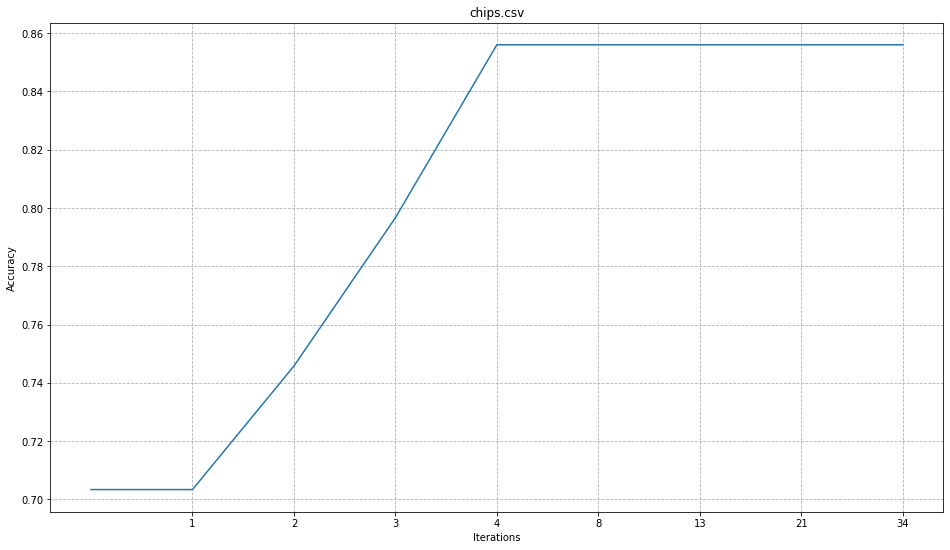

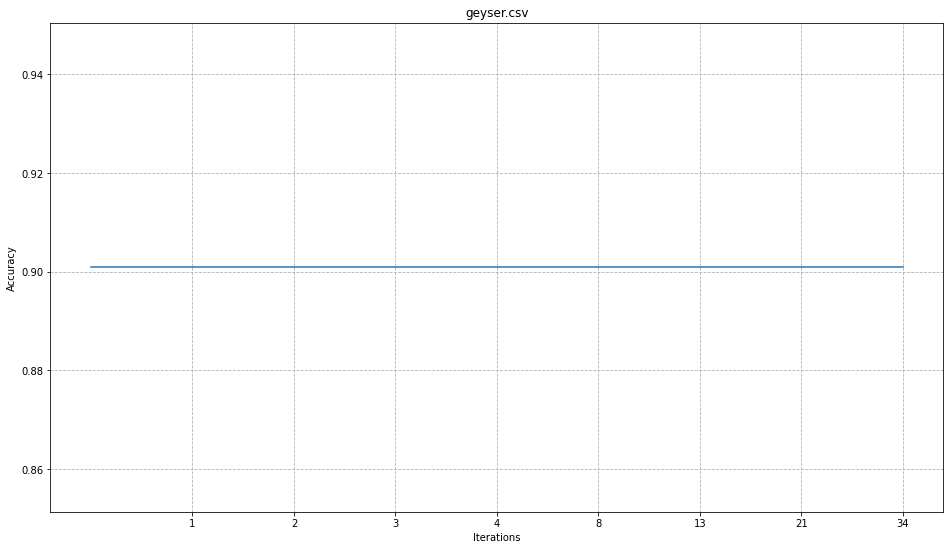

In [128]:
# xx = [1, 2, 3, 4, 8, 13, 21, 34, 55]
xx = [i for i in range(1, 10)]
labels = ['1', '2', '3', '4', '8', '13', '21', '34', '55']
for file, accuracies in zip(datasets_files, all_accuracies):
    plt.figure(figsize=(16,9))
    plt.grid(linestyle='--')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title(file)
    plt.xticks(xx, labels)
    values = [accuracies[i - 1] for i in xx]
    xi = list(range(len(xx)))
    plt.plot(xi, values)
#     plt.plot(np.asarray(accuracies)[[0, 1, 2, 3, 7, 12, 20, 33, 54]])
    plt.show()

In [129]:
def draw(clf, X, y, title, step=0.01):
    stepx = step
    stepy = 0.01
    x_min, y_min = np.amin(X, 0)
    x_max, y_max = np.amax(X, 0)
    x_min -= stepx
    x_max += stepx
    y_min -= stepy
    y_max += stepy
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepx),
                         np.arange(y_min, y_max, stepy))
    
    mesh_dots = np.c_[xx.ravel(), yy.ravel()]
    zz = clf.predict(mesh_dots)
    zz = np.array(zz).reshape(xx.shape)
    
    plt.figure(figsize=(16, 9))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    x0, y0 = X[y == -1].T
    x1, y1 = X[y == 1].T
    
    plt.pcolormesh(xx, yy, zz, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), shading='auto')
    plt.scatter(x0, y0, color='red', s=100)
    plt.scatter(x1, y1, color='blue', s=100)
    plt.title(title)
    plt.show()

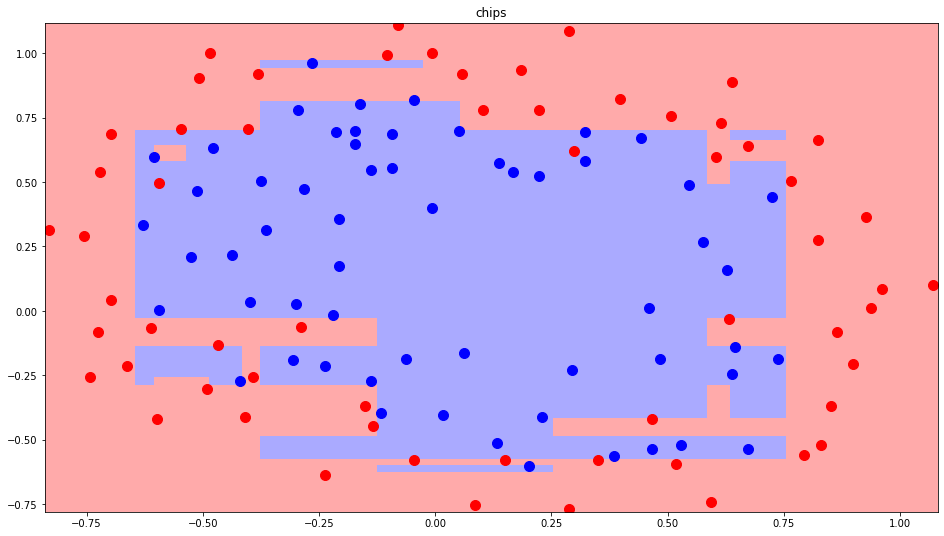

In [130]:
draw(clfs[0], *datasets[0], "chips", 0.01)

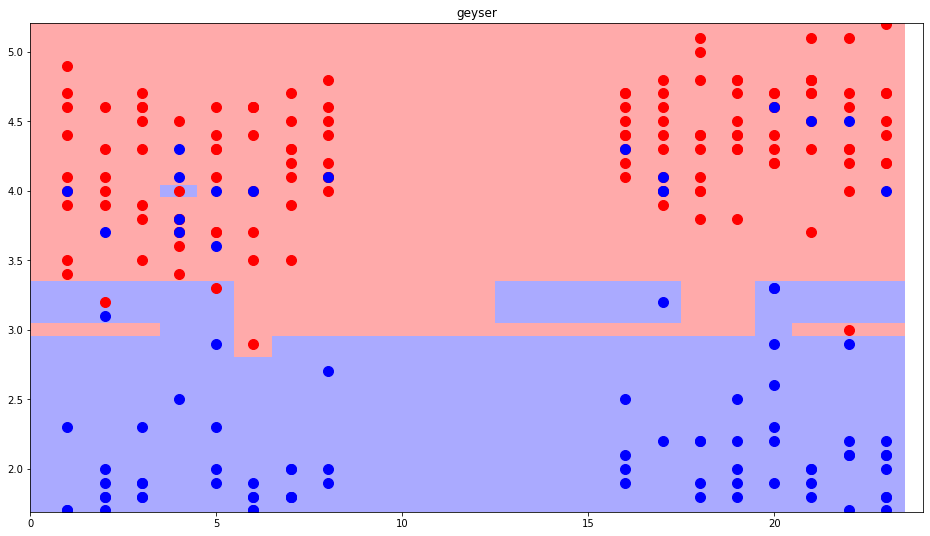

In [131]:
draw(clfs[1], *datasets[1], "geyser", 1)